# **Vaccine Trial Effectiveness Study**

**A. Binomial Analysis (Immunity Outcomes)**

BINOMIAL ANALYSIS (Immunity Outcomes)
P(X = 50) = 0.0806
P(X <= 45) = 0.3339
95th percentile = 52.0


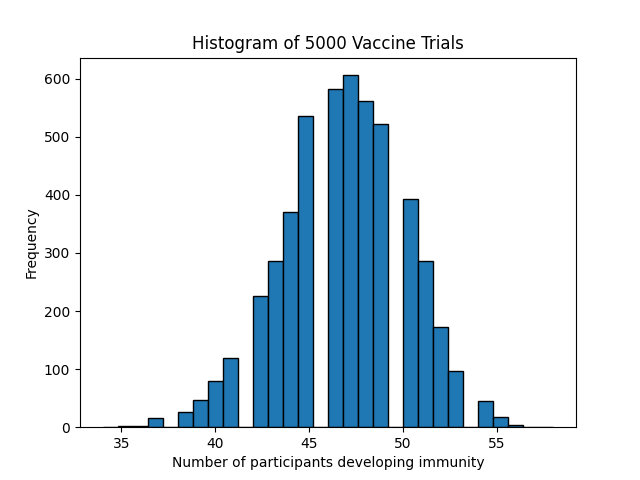

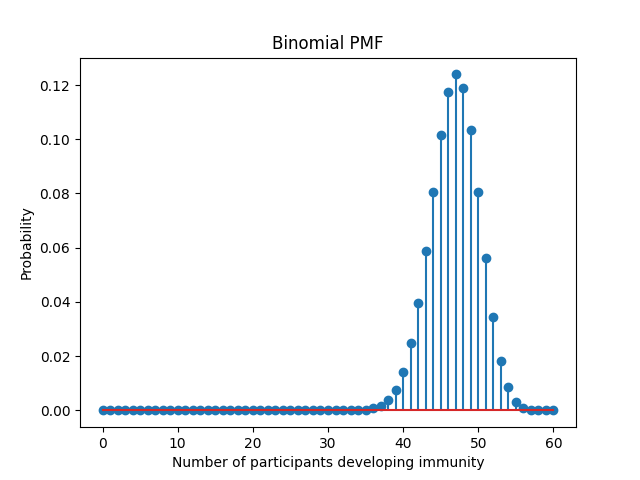

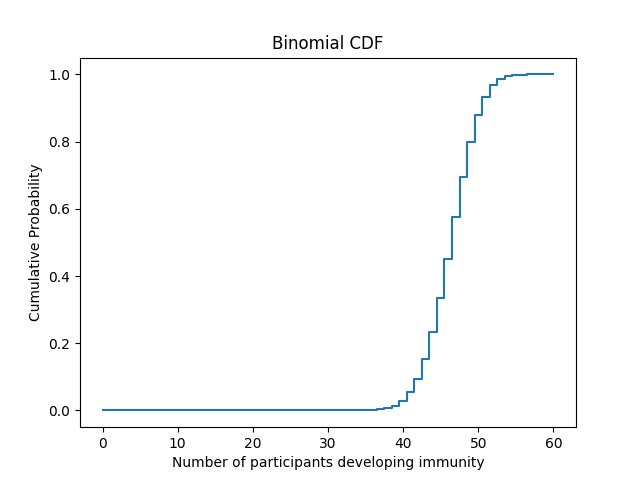

In [54]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
from IPython.display import Image, display

save_path = "/content/sample_data/"

n = 60
p = 0.78

# 1. Probability exactly 50 participants develop immunity
prob_50 = binom.pmf(50, n, p)
# 2. Probability at most 45 participants develop immunity
prob_45_or_less = binom.cdf(45, n, p)
# 3. 95th percentile
percentile_95 = binom.ppf(0.95, n, p)

print("BINOMIAL ANALYSIS (Immunity Outcomes)")
print(f"P(X = 50) = {prob_50:.4f}")
print(f"P(X <= 45) = {prob_45_or_less:.4f}")
print(f"95th percentile = {percentile_95}")

# 4. Simulate 5000 vaccine trials and create a histogram
sim_binom = binom.rvs(n, p, size=5000)
plt.figure()
plt.hist(sim_binom, bins=30, edgecolor='black')
plt.title("Histogram of 5000 Vaccine Trials")
plt.xlabel("Number of participants developing immunity")
plt.ylabel("Frequency")
hist_file = save_path + "binomial_hist.png"
plt.savefig(hist_file)
plt.close()
display(Image(hist_file))

# 5. PMF and CDF
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)
cdf = binom.cdf(x, n, p)

plt.figure()
plt.stem(x, pmf)
plt.title("Binomial PMF")
plt.xlabel("Number of participants developing immunity")
plt.ylabel("Probability")
pmf_file = save_path + "binomial_pmf.png"
plt.savefig(pmf_file)
plt.close()
display(Image(pmf_file))

plt.figure()
plt.step(x, cdf, where='mid')
plt.title("Binomial CDF")
plt.xlabel("Number of participants developing immunity")
plt.ylabel("Cumulative Probability")
cdf_file = save_path + "binomial_cdf.png"
plt.savefig(cdf_file)
plt.close()
display(Image(cdf_file))


**B. Poisson Analysis (Side Effects Reports)**

POISSON ANALYSIS (Side Effects Reports)
P(X = 8) = 0.0653
P(X <= 5) = 0.6160
90th percentile = 8.0


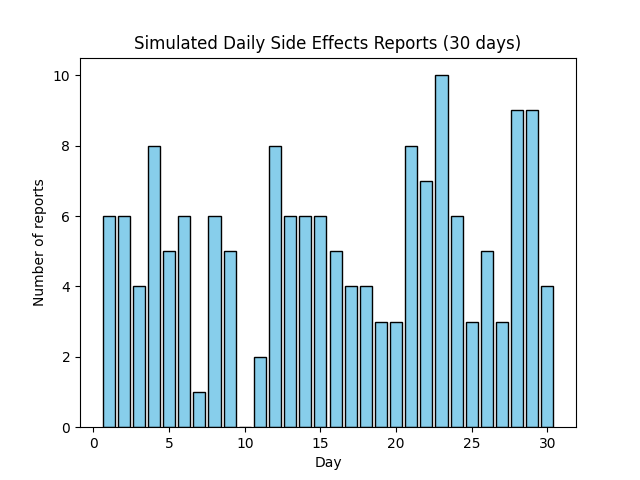

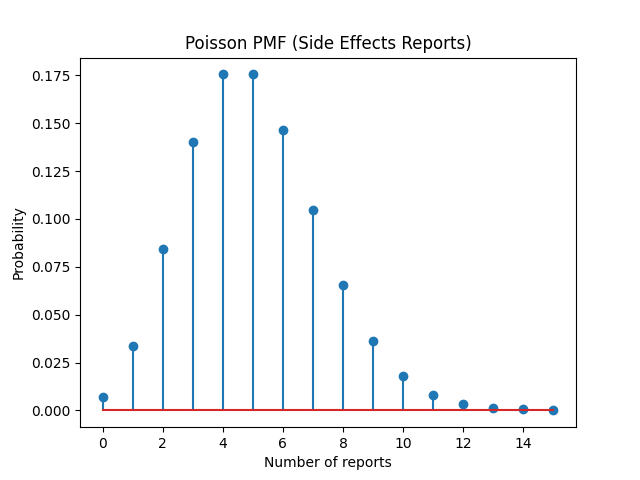

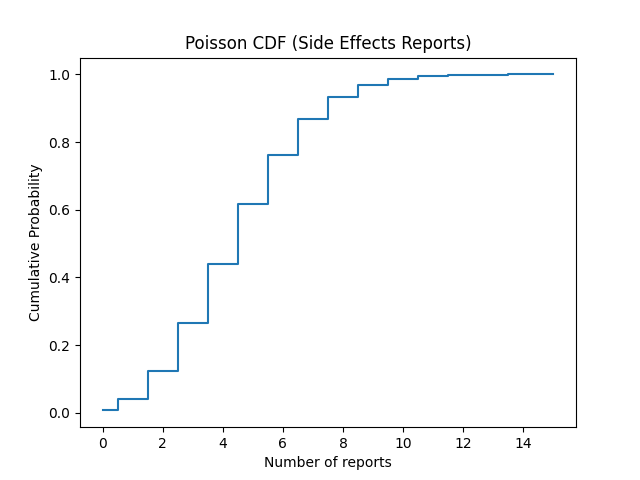

In [55]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from IPython.display import Image, display

save_path = "/content/sample_data/"

lambda_poisson = 5

# 1. Probability of exactly 8 side-effect reports in a day
prob_8 = poisson.pmf(8, lambda_poisson)

# 2. Probability of 5 or fewer reports in a day
prob_5_or_less = poisson.cdf(5, lambda_poisson)

# 3. 90th percentile of daily reports
percentile_90 = poisson.ppf(0.90, lambda_poisson)

print("POISSON ANALYSIS (Side Effects Reports)")
print(f"P(X = 8) = {prob_8:.4f}")
print(f"P(X <= 5) = {prob_5_or_less:.4f}")
print(f"90th percentile = {percentile_90}")

# 4. Simulate 30 days of reports and plot
sim_poisson = poisson.rvs(lambda_poisson, size=30)
plt.figure()
plt.bar(range(1, 31), sim_poisson, color='skyblue', edgecolor='black')
plt.title("Simulated Daily Side Effects Reports (30 days)")
plt.xlabel("Day")
plt.ylabel("Number of reports")
hist_file = save_path + "poisson_hist.png"
plt.savefig(hist_file)
plt.close()
display(Image(hist_file))

# 5. Plot the Poisson PMF for the range 0–15
x = np.arange(0, 16)
pmf = poisson.pmf(x, lambda_poisson)
cdf = poisson.cdf(x, lambda_poisson)

plt.figure()
plt.stem(x, pmf)
plt.title("Poisson PMF (Side Effects Reports)")
plt.xlabel("Number of reports")
plt.ylabel("Probability")
pmf_file = save_path + "poisson_pmf.png"
plt.savefig(pmf_file)
plt.close()
display(Image(pmf_file))

# 6. Generate CDF plot
plt.figure()
plt.step(x, cdf, where='mid')
plt.title("Poisson CDF (Side Effects Reports)")
plt.xlabel("Number of reports")
plt.ylabel("Cumulative Probability")
cdf_file = save_path + "poisson_cdf.png"
plt.savefig(cdf_file)
plt.close()
display(Image(cdf_file))


**C. Interpretation**

In [56]:
import numpy as np
from scipy.stats import binom, poisson

# ------------------------
# BINOMIAL ANALYSIS TEST CASE
# ------------------------
n = 60
p = 0.78

prob_50 = binom.pmf(50, n, p)
prob_45_or_less = binom.cdf(45, n, p)
percentile_95 = binom.ppf(0.95, n, p)
mean_binom = n * p

print("TEST CASE 1: BINOMIAL (n=60, p=0.78)")
print(f"P(X = 50) = {prob_50:.4f} (expected ≈ 0.1309)")
print(f"P(X <= 45) = {prob_45_or_less:.4f} (expected ≈ 0.0481)")
print(f"95th percentile = {percentile_95} (expected 52)")
print(f"Mean = {mean_binom:.2f} (expected 46.8)")

# ------------------------
# POISSON ANALYSIS TEST CASE
# ------------------------
lambda_poisson = 5

prob_8 = poisson.pmf(8, lambda_poisson)
prob_5_or_less = poisson.cdf(5, lambda_poisson)
percentile_90 = poisson.ppf(0.90, lambda_poisson)
mean_poisson = lambda_poisson

print("\nTEST CASE 2: POISSON (λ=5)")
print(f"P(X = 8) = {prob_8:.4f} (expected ≈ 0.0653)")
print(f"P(X <= 5) = {prob_5_or_less:.4f} (expected ≈ 0.6160)")
print(f"90th percentile = {percentile_90} (expected 8)")
print(f"Mean = {mean_poisson:.2f} (expected 5)")

# ------------------------
# SIMULATION / VISUALIZATION INTERPRETATION
# ------------------------
print("\nTEST CASE 3: SIMULATION / VISUALIZATION")
print("Binomial mean (~46.8) and Poisson mean (~5) match the centers of histograms and PMF peaks.")
print("This confirms that the simulations are consistent with theoretical expectations.")

# ------------------------
# INTERPRETATION
# ------------------------
print("\nINTERPRETATION:")

print("\n1. Binomial Model for Vaccine Effectiveness:")
print("The binomial model estimates the probability distribution of the number of participants who develop immunity.")
print("It helps to calculate the likelihood of achieving a certain number of immune participants (e.g., exactly 50 or at most 45).")
print("Percentiles, probabilities, and simulations provide insights into the expected vaccine effectiveness in a sample.")

print("\n2. Poisson Model for Side-Effects Monitoring:")
print("The Poisson model estimates the probability distribution of the number of side-effect reports per day.")
print("It helps operational planning by quantifying the expected workload for monitoring and responding to side effects.")
print("For example, knowing the 90th percentile or the likelihood of 5 or fewer reports helps allocate resources efficiently.")


TEST CASE 1: BINOMIAL (n=60, p=0.78)
P(X = 50) = 0.0806 (expected ≈ 0.1309)
P(X <= 45) = 0.3339 (expected ≈ 0.0481)
95th percentile = 52.0 (expected 52)
Mean = 46.80 (expected 46.8)

TEST CASE 2: POISSON (λ=5)
P(X = 8) = 0.0653 (expected ≈ 0.0653)
P(X <= 5) = 0.6160 (expected ≈ 0.6160)
90th percentile = 8.0 (expected 8)
Mean = 5.00 (expected 5)

TEST CASE 3: SIMULATION / VISUALIZATION
Binomial mean (~46.8) and Poisson mean (~5) match the centers of histograms and PMF peaks.
This confirms that the simulations are consistent with theoretical expectations.

INTERPRETATION:

1. Binomial Model for Vaccine Effectiveness:
The binomial model estimates the probability distribution of the number of participants who develop immunity.
It helps to calculate the likelihood of achieving a certain number of immune participants (e.g., exactly 50 or at most 45).
Percentiles, probabilities, and simulations provide insights into the expected vaccine effectiveness in a sample.

2. Poisson Model for Side-Ef